# Logistic Regression

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [56]:
df_training = pd.read_csv("../data_mod/train_motion_data.csv")
df_test = pd.read_csv("../data_mod/test_motion_data.csv")

df_training

,AccX,AccY,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,NORMAL,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,NORMAL,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,NORMAL,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,NORMAL,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,NORMAL,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,SLOW,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,SLOW,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,SLOW,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,SLOW,-0.126579,-0.680043,-0.174712,0.033630


In [57]:
df_training.isna().sum()

AccX        0
AccY        0
Class       0
DiffAccX    0
DiffAccY    0
VelX        0
VelY        0
dtype: int64

## Change categories to numbers

In [58]:
df_training = df_training.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_test = df_test.replace(
    {"Class": {"NORMAL": 0, "AGGRESSIVE": 1, "SLOW": 2}})
df_training

,AccX,AccY,Class,DiffAccX,DiffAccY,VelX,VelY
0,0.000000,0.000000,0,0.000000,0.000000,0.000000,0.000000
1,-1.624864,-1.082492,0,-1.624864,-1.082492,-0.812432,-0.541246
2,-0.594660,-0.122410,0,1.030204,0.960082,-0.297330,-0.061205
3,0.738478,-0.228456,0,1.333138,-0.106046,0.369239,-0.114228
4,0.101741,0.777568,0,-0.636737,1.006023,0.050871,0.388784
...,...,...,...,...,...,...,...
3639,0.915688,-2.017489,2,2.374675,-1.824629,0.457844,-1.008745
3640,-1.934203,0.914925,2,-2.849891,2.932414,-0.967102,0.457462
3641,-0.222845,0.747304,2,1.711359,-0.167621,-0.111422,0.373652
3642,-0.349423,0.067261,2,-0.126579,-0.680043,-0.174712,0.033630


## Normalize the data

In [59]:
X_training = df_training.drop(columns=["Class"])
X_training = (X_training - X_training.mean()) / X_training.std() * 100

X_training["Class"] = df_training["Class"]
X_training

,AccX,AccY,DiffAccX,DiffAccY,VelX,VelY,Class
0,-4.105593,8.126800,0.010300,-0.010421,-4.105593,8.126800,0
1,-168.957027,-111.696347,-151.542377,-101.201825,-168.957027,-111.696347,0
2,-64.437130,-5.422989,96.098456,89.738101,-64.437130,-5.422989,0
3,70.817107,-17.161393,124.353421,-9.923577,70.817107,-17.161393,0
4,6.216602,94.197287,-59.378806,94.032688,6.216602,94.197287,0
...,...,...,...,...,...,...,...
3639,88.795978,-215.193071,221.498566,-170.576840,88.795978,-215.193071,2
3640,-200.341232,109.401604,-265.801873,274.111831,-200.341232,109.401604,2
3641,-26.714411,90.847295,159.630443,-15.679652,-26.714411,90.847295,2
3642,-39.556507,15.572024,-11.795809,-63.580862,-39.556507,15.572024,2


In [60]:
X_testing = df_test.drop(columns="Class")
X_testing = (X_testing - X_testing.mean()) / X_testing.std() * 100

X_testing["Class"] = df_test["Class"]
X_testing

,AccX,AccY,DiffAccX,DiffAccY,VelX,VelY,Class
0,67.345100,-9.509000,-0.021340,-0.012385,-10.948927,14.564454,1
1,57.982946,10.303100,-8.494392,16.758078,58.012497,10.295271,1
2,270.452050,-824.010358,192.270076,-706.238535,270.496822,-824.016540,1
3,229.805029,-828.171460,-36.808209,-3.534656,229.846889,-828.177633,1
4,283.133326,-732.402479,48.242495,81.053740,283.179007,-732.408842,1
...,...,...,...,...,...,...,...
3079,-84.712435,-57.627689,-73.609489,-1.097380,-84.693107,-57.635384,2
3080,145.444037,51.068429,208.277716,91.996249,145.479853,51.060520,2
3081,121.268079,-177.287100,-21.901364,-193.309813,121.302164,-177.294558,2
3082,83.265000,79.069807,-34.415357,216.987532,83.296362,79.061842,2


## Train model

In [61]:
X_train = X_training.drop(columns="Class")
y_train = X_training.Class

X_test = X_testing.drop(columns="Class")
y_test = X_testing.Class

In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [63]:
lr = LogisticRegression(random_state=0)

param_grid = {'max_iter': np.arange(80, 200)}

lr_gscv = GridSearchCV(lr, param_grid, cv=5, verbose=10, n_jobs=10)
lr_gscv.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5; 1/120] START max_iter=80...............................................
[CV 2/5; 1/120] START max_iter=80...............................................
[CV 3/5; 1/120] START max_iter=80...............................................
[CV 4/5; 1/120] START max_iter=80...............................................
[CV 5/5; 1/120] START max_iter=80...............................................
[CV 1/5; 2/120] START max_iter=81...............................................
[CV 2/5; 2/120] START max_iter=81...............................................
[CV 3/5; 2/120] START max_iter=81...............................................
[CV 4/5; 2/120] START max_iter=81...............................................
[CV 5/5; 2/120] START max_iter=81...............................................
[CV 1/5; 1/120] END ................max_iter=80;, score=0.406 total time=   0.0s
[CV 4/5; 1/120] END ................max_iter=8

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=0), n_jobs=10,
             param_grid={'max_iter': array([ 80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,
        93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105,
       106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118,
       119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131,
       132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144,
       145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
       158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170,
       171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183,
       184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196,
       197, 198, 199])},
             verbose=10)

In [64]:
best_params = lr_gscv.best_params_
best_params

{'max_iter': 80}

In [65]:
lr_gscv.best_score_

0.4124602420898717

In [66]:
lr_gscv.score(X_train, y_train)

0.41794731064763996

In [67]:
lr_gscv.score(X_test, y_test)

0.4789234760051881

In [68]:
classes = ["NORMAL", "AGGRESIVE", "SLOW"]

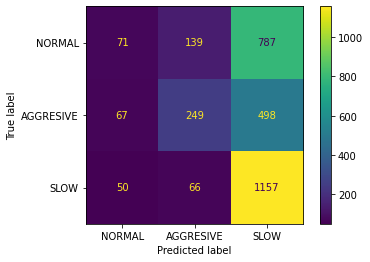

In [69]:
y_pred = lr_gscv.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

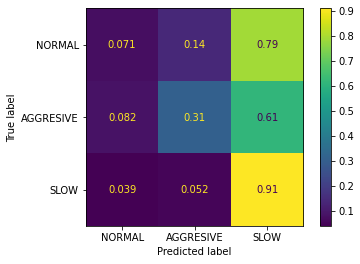

In [70]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

### Train model with bagging

In [71]:
from sklearn.ensemble import BaggingClassifier

lr_bagging = BaggingClassifier(lr_gscv.best_estimator_, max_samples=0.5, max_features=0.7, random_state=0)
lr_bagging.fit(X_train, y_train)

BaggingClassifier(base_estimator=LogisticRegression(max_iter=80,
                                                    random_state=0),
                  max_features=0.7, max_samples=0.5, random_state=0)

In [72]:
lr_bagging.score(X_train, y_train)

0.4080680570801317

In [73]:
lr_bagging.score(X_test, y_test)

0.4646562905317769

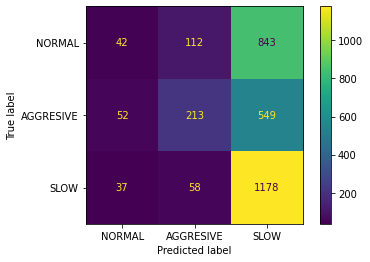

In [74]:
y_pred = lr_bagging.predict(X_test)

CM = confusion_matrix(y_test, y_pred)
display = ConfusionMatrixDisplay(confusion_matrix=CM,
                       display_labels=classes)
display.plot()

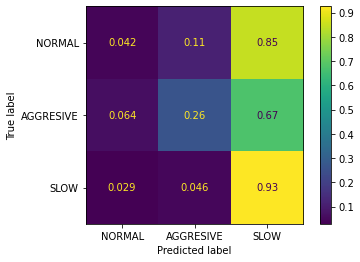

In [75]:
CM_norm = confusion_matrix(y_test, y_pred, normalize="true")
display = ConfusionMatrixDisplay(confusion_matrix=CM_norm,
                       display_labels=classes)
display.plot()

In [76]:
def evaluate(model, test_features, test_labels):
    accuracy = model.score(test_features, test_labels)
    print('Model Performance')
    print('Accuracy = {:0.3f}%.'.format(accuracy))
    
    return accuracy

bagging_accuracy = evaluate(lr_bagging, X_test, y_test)

best_random = lr_gscv.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

print(f'Improvement of {100 * (bagging_accuracy - random_accuracy) / random_accuracy:.3f}%.')

Model Performance
Accuracy = 0.465%.
Model Performance
Accuracy = 0.479%.
Improvement of -2.979%.
